# Project: CO concentration Prediction using RNN AND LSTM

## Project By : Deepthi D'Souza
This project aims to analyze air quality data and build predictive models to forecast CO concentration. It involves preprocessing, visualizing, normalizing, and training Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM) models on the dataset.

### Dataset Information:
* The dataset contains air quality measurements from an urban area.
* Features include Date, Time, Temperature (T), Relative Humidity (RH), and various gas concentrations such as CO (CO(GT)), Benzene (C6H6(GT)), Nitrogen Monoxide (NOx(GT)), Nitrogen Dioxide (NO2(GT)), and more.
* Some placeholder values (-200) indicate missing data, which are replaced with NaN during preprocessing.


### Step 1: Importing required libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Step 2: Reading, Preprocessing and Printing Main Statistics

In [1]:
# Reading and Preprocessing the Dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';')
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Data Preprocessing
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.').astype(float)  # Replace commas with dots and convert to float
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.').astype(float)
df['T'] = df['T'].str.replace(',', '.').astype(float)
df['RH'] = df['RH'].str.replace(',', '.').astype(float)
df['AH'] = df['AH'].str.replace(',', '.').astype(float)

# Display basic statistics and check for any remaining NaN values
df = df.replace(-200, np.nan)
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,0.0,0.0
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,NaN,NaN
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813,NaN,NaN
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,NaN,NaN
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800,NaN,NaN
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,NaN,NaN
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
df.isnull().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [13]:
df = df.replace(-200, np.nan)  # Replace placeholder values with NaN
df = df.drop(columns=['NMHC(GT)', 'Unnamed: 15', 'Unnamed: 16'])  # Drop unnecessary columns
df = df.dropna()  # Drop rows with NaN values
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
df.shape

(6941, 14)

### Step 3: Data Visualization

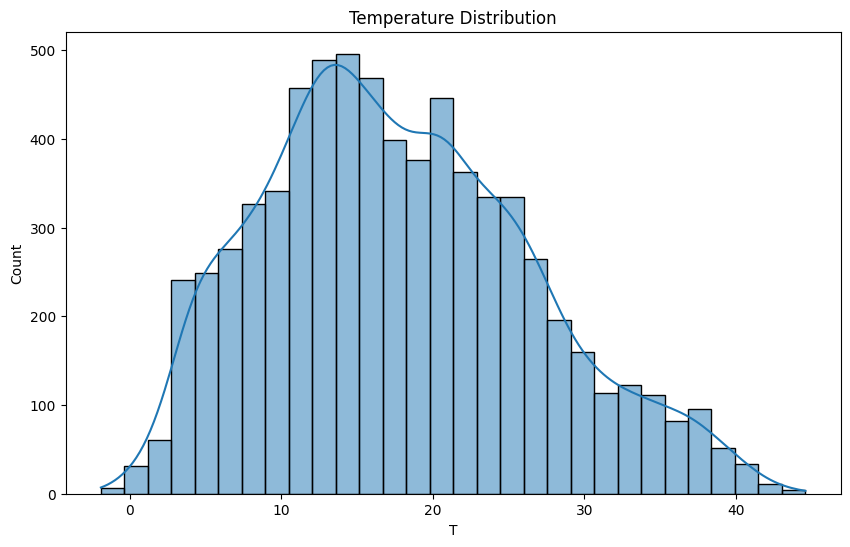

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Temperature distribution
plt.figure(figsize=(10,6))
sns.histplot(df['T'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.show()

<ipython-input-16-eb924870e60a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


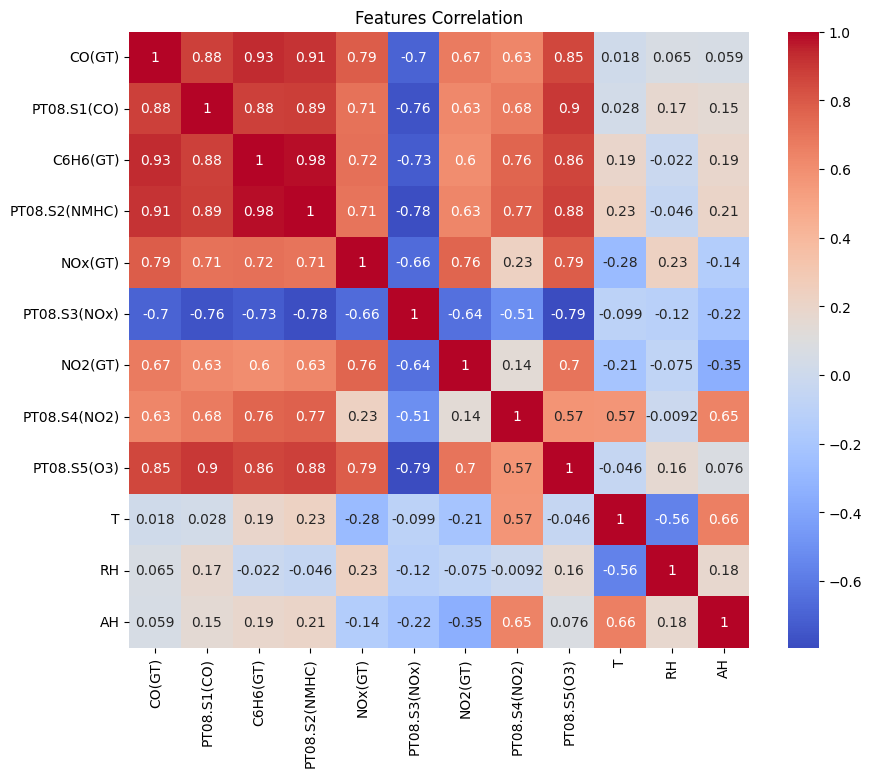

In [16]:
# Heatmap of features correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Features Correlation')
plt.show()

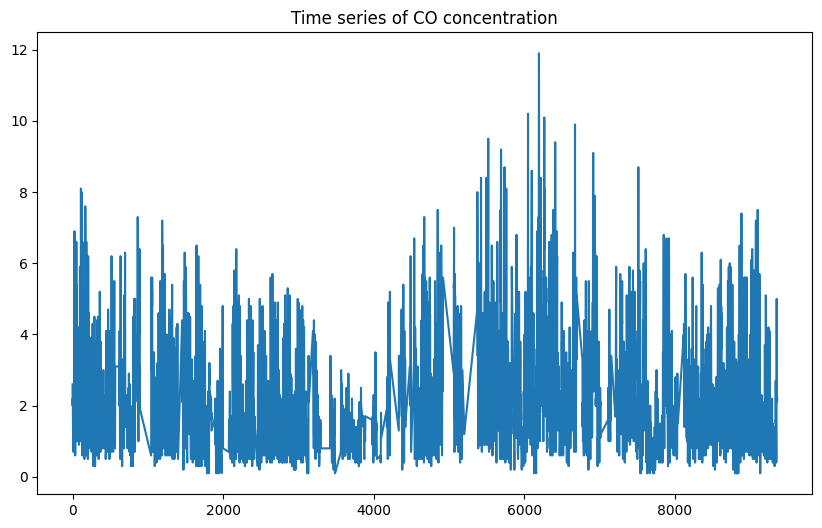

In [17]:
# Time series plot of CO concentration
plt.figure(figsize=(10,6))
df['CO(GT)'].plot()
plt.title('Time series of CO concentration')
plt.show()

In [18]:
display(df)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


### Step 4: Normalization

In [20]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Select columns to normalize
columns_to_normalize = df.columns.drop(['Date', 'Time'])
# Normalize selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

### Step 5: Dataset split

In [21]:
# split Datasets to training an testing

features = df[['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]
target = df['CO(GT)']

X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)
X_val = torch.tensor(X_val.values, dtype=torch.float)
y_val = torch.tensor(y_val.values, dtype=torch.float)

X_train = torch.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = torch.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = torch.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

### Step 6: Model Traning : **RNN**

In [22]:
# Model Training: RNN
class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers,
            batch_first=True)
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

### Step 7: Hyperparameters setups  - 6 Setups (BY changing 3 parameters)

Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.0433480404317379 | Validation Loss:  0.26243528723716736
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.25880900025367737 | Validation Loss:  0.01452941820025444
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.015961280092597008 | Validation Loss:  0.0458146333694458
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.05032956227660179 | Validation Loss:  0.053328413516283035
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.05792020261287689 | Validation Loss:  0.03121487982571125
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.03491869941353798 | Validation Loss:  0.014510874636471272
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'}

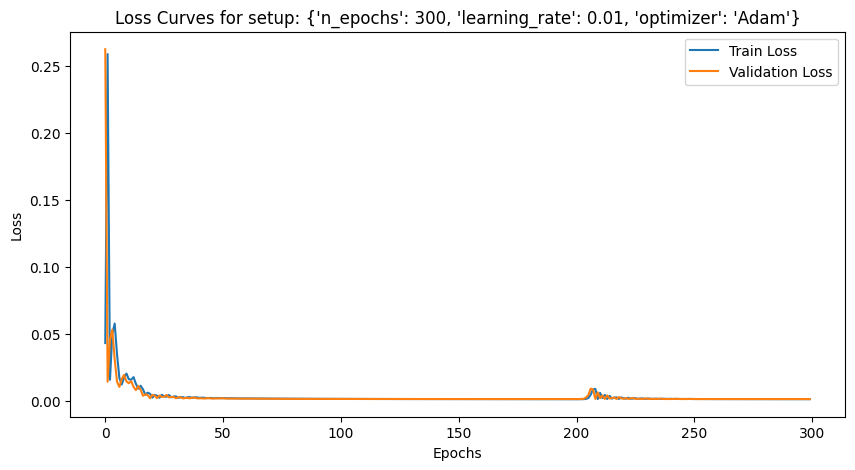

Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Test Loss:  0.0012869234196841717
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.14617960155010223 | Validation Loss:  0.02272380143404007
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.0233427993953228 | Validation Loss:  0.013945214450359344
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.015303298830986023 | Validation Loss:  0.03373272716999054
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.03758110851049423 | Validation Loss:  0.008164940401911736
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.009431888349354267 | Validation Loss:  0.029092442244291306
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.02867258712649

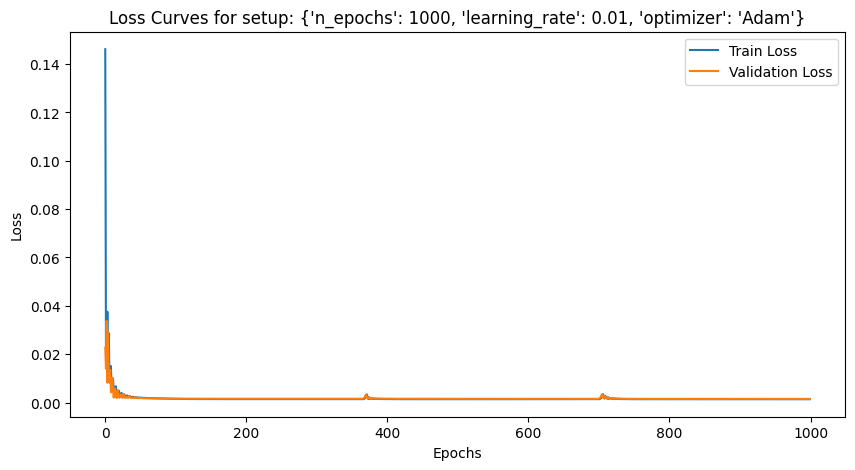

Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Test Loss:  0.0011501767439767718
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.02425028197467327 | Validation Loss:  19.881811141967773
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  19.835182189941406 | Validation Loss:  8.01113224029541
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  7.996798038482666 | Validation Loss:  18.77802276611328
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  18.731494903564453 | Validation Loss:  17.72003746032715
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  17.674909591674805 | Validation Loss:  4.451910972595215
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  4.430567741394043 | Validation Loss:  0.

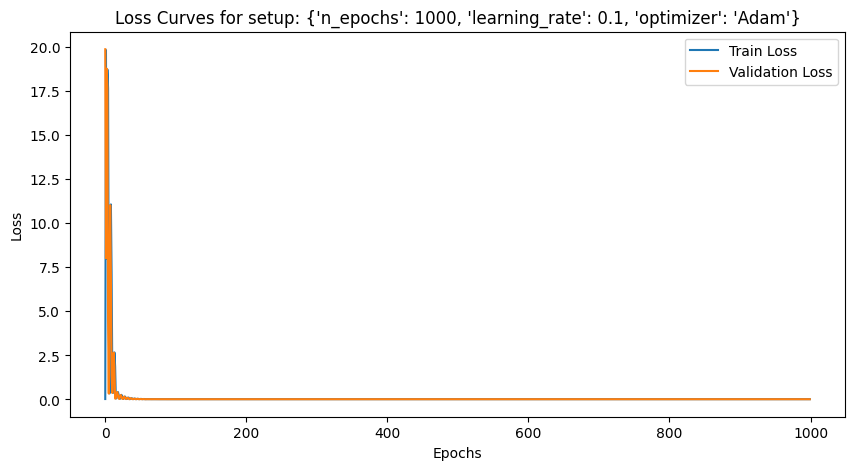

Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Test Loss:  0.01356145367026329
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.04851577803492546 | Validation Loss:  0.0266716331243515
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.030548375099897385 | Validation Loss:  0.016498297452926636
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.019654177129268646 | Validation Loss:  0.012732419185340405
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.015210689045488834 | Validation Loss:  0.013887622393667698
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.01577211357653141 | Validation Loss:  0.017041156068444252
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.01848544

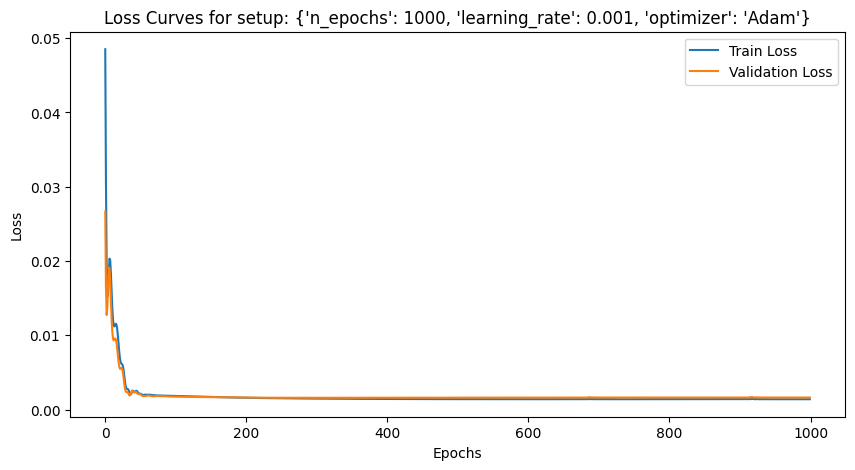

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Test Loss:  0.0012132583651691675
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  0 | Train Loss:  0.11388465762138367 | Validation Loss:  0.10682743042707443
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  1 | Train Loss:  0.11268460005521774 | Validation Loss:  0.10566382855176926
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  2 | Train Loss:  0.1114991307258606 | Validation Loss:  0.104514479637146
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  3 | Train Loss:  0.11032804846763611 | Validation Loss:  0.10337921977043152
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  4 | Train Loss:  0.10917117446660995 | Validation Loss:  0.1022578626871109
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  5 | Train Loss:  0.1080283671617508 | V

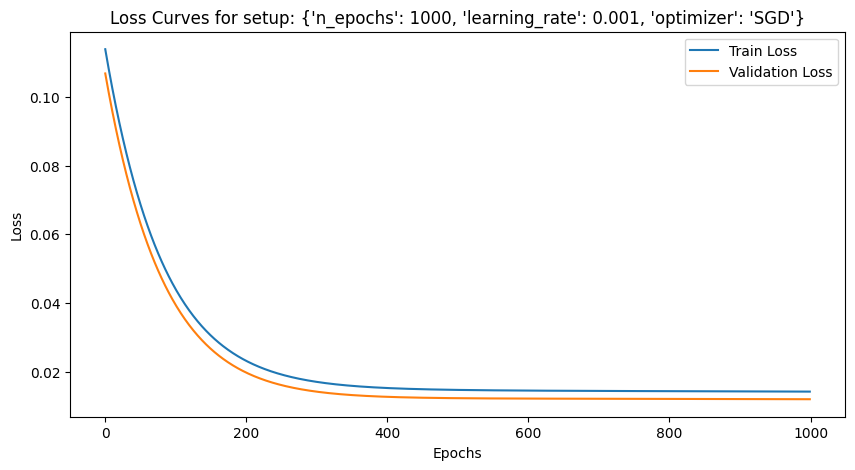

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Test Loss:  0.012044437229633331
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  0 | Train Loss:  0.11612656712532043 | Validation Loss:  0.09686417877674103
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  1 | Train Loss:  0.09574763476848602 | Validation Loss:  0.032469313591718674
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  2 | Train Loss:  0.03645578771829605 | Validation Loss:  0.011722801253199577
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  3 | Train Loss:  0.014066985808312893 | Validation Loss:  0.010737797245383263
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  4 | Train Loss:  0.012735322117805481 | Validation Loss:  0.01009513158351183
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  5 | Trai

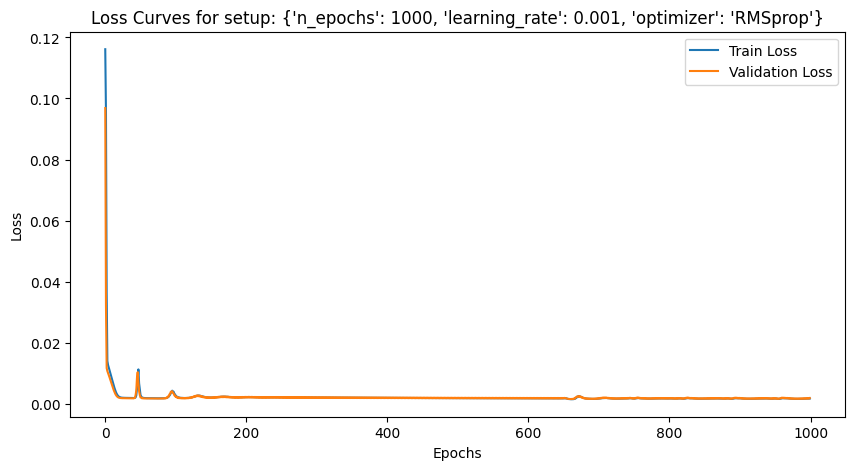

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Test Loss:  0.0015805650036782026


In [23]:
import matplotlib.pyplot as plt

best_val_loss = float('inf')
best_model_path = "model_weights_best.pth"

setups = [
    {"n_epochs": 300, "learning_rate": 0.01, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.01, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.1, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "SGD"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "RMSprop"}
]

input_size = X_train.shape[2]
hidden_size = 64
output_size = 1
num_layers = 3

for setup in setups:
    n_epochs = setup["n_epochs"]
    learning_rate = setup["learning_rate"]
    optimizer_name = setup["optimizer"]

    rnn = RNN(input_size, hidden_size, num_layers, output_size)
    if optimizer_name == "Adam":
        optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
    elif optimizer_name == "SGD":
        optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(rnn.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Invalid optimizer name: {optimizer_name}")

    criterion = nn.MSELoss()

    train_losses = []
    val_losses = []

    for epoch in range(n_epochs):
        rnn.train()
        hidden_state = None
        output, hidden_state = rnn(X_train, hidden_state)
        loss = criterion(output.view(-1), y_train)
        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        rnn.eval()
        val_hidden_state = None
        test_output, _ = rnn(X_val, val_hidden_state)
        val_loss = criterion(test_output.view(-1), y_val)
        val_losses.append(val_loss.item())
        print('Setup: ', setup, 'Epoch: ', epoch, '| Train Loss: ', loss.item(), '| Validation Loss: ', val_loss.item())

        if val_loss < best_val_loss:
            torch.save(rnn.state_dict(), best_model_path)
            best_val_loss = val_loss

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"Loss Curves for setup: {setup}")
    plt.legend()
    plt.show()

    rnn.eval()
    test_hidden_state = None
    pred_test, _ = rnn(X_test, test_hidden_state)
    test_loss = criterion(pred_test.view(-1), y_test)
    print('Setup: ', setup, 'Test Loss: ', test_loss.item())


### Step 8: Model Traning : **LSTM**

In [24]:
class LSTM(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers,
            batch_first=True)
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x):
        r_out, (h_n, h_c) = self.lstm(x, None)
        outs = self.out(r_out[:, -1, :])
        return outs



### Step 9: Hyperparameters setups  - 6 Setups (BY changing 3 parameters)

Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.08273070305585861 | Validation Loss:  0.04841369763016701
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.0530138798058033 | Validation Loss:  0.025594227015972137
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.029277393594384193 | Validation Loss:  0.012143105268478394
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.014545761980116367 | Validation Loss:  0.023148594424128532
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.02382880635559559 | Validation Loss:  0.025113968178629875
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.02571435086429119 | Validation Loss:  0.016970865428447723
Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'A

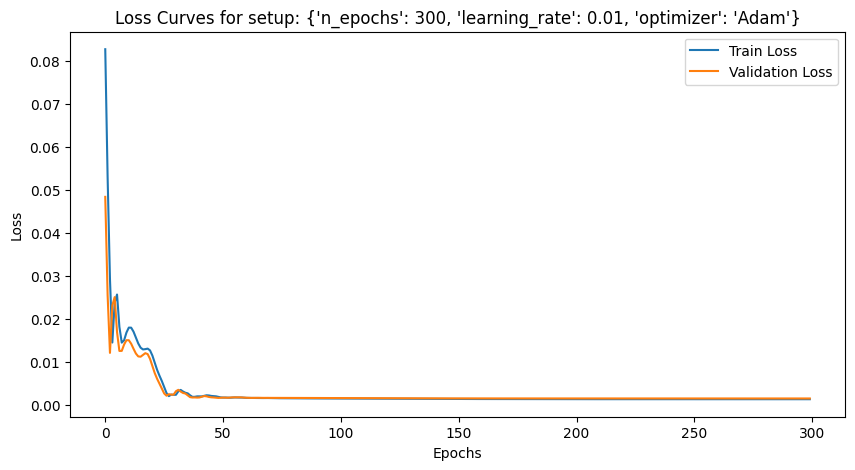

Setup:  {'n_epochs': 300, 'learning_rate': 0.01, 'optimizer': 'Adam'} Test Loss:  0.0011688509257510304
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.06149870157241821 | Validation Loss:  0.03264636546373367
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.036699000746011734 | Validation Loss:  0.01674584671854973
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.019861580803990364 | Validation Loss:  0.013334487564861774
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.015215486288070679 | Validation Loss:  0.024187926203012466
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.025000466033816338 | Validation Loss:  0.021160099655389786
Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.02219708636

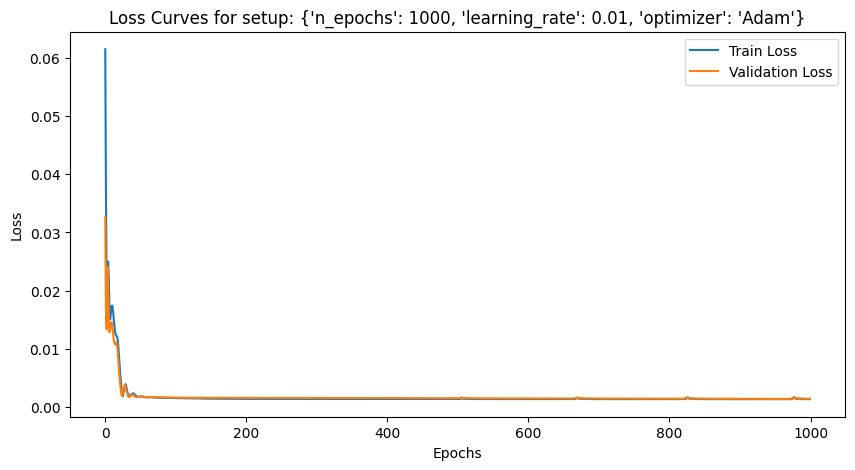

Setup:  {'n_epochs': 1000, 'learning_rate': 0.01, 'optimizer': 'Adam'} Test Loss:  0.0011564893648028374
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.026276126503944397 | Validation Loss:  1.6759430170059204
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  1.6768746376037598 | Validation Loss:  0.029952386394143105
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.0290809515863657 | Validation Loss:  1.483262062072754
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  1.4944303035736084 | Validation Loss:  0.5804784297943115
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.5923298001289368 | Validation Loss:  0.06254680454730988
Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.06756748259067535 | Validatio

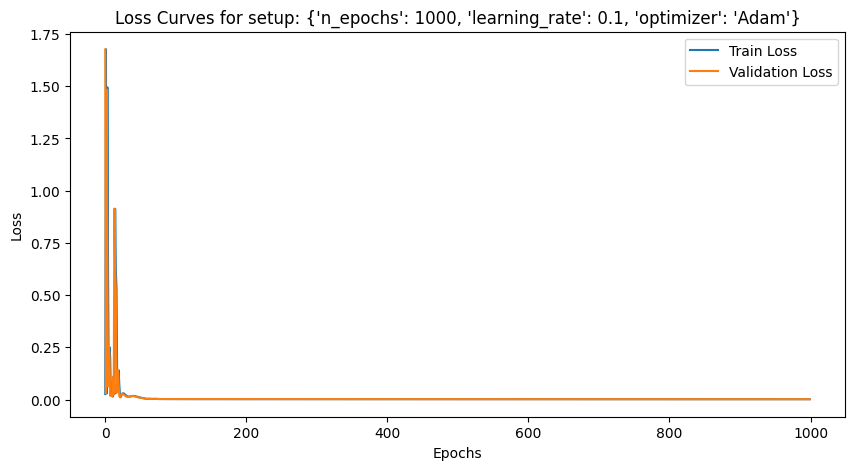

Setup:  {'n_epochs': 1000, 'learning_rate': 0.1, 'optimizer': 'Adam'} Test Loss:  0.0011749848490580916
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  0 | Train Loss:  0.025992143899202347 | Validation Loss:  0.021261710673570633
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  1 | Train Loss:  0.024769198149442673 | Validation Loss:  0.020189842209219933
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  2 | Train Loss:  0.023625291883945465 | Validation Loss:  0.019194098189473152
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  3 | Train Loss:  0.022557444870471954 | Validation Loss:  0.018272606655955315
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  4 | Train Loss:  0.021563587710261345 | Validation Loss:  0.01742403395473957
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Epoch:  5 | Train Loss:  0.020

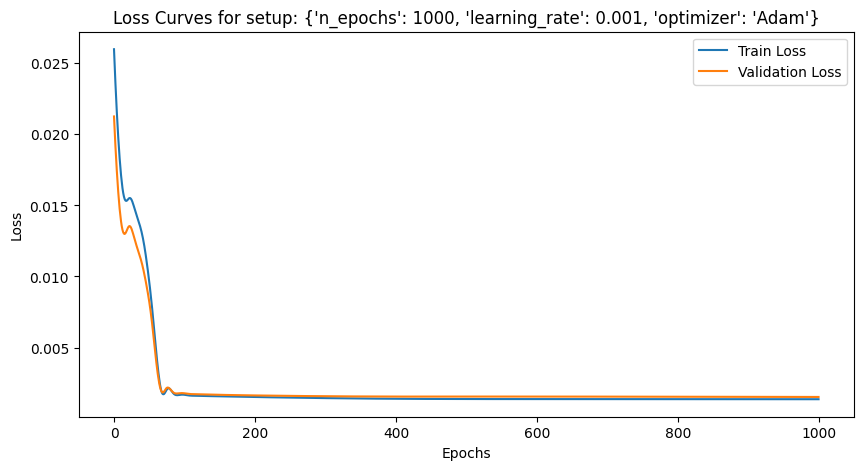

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'Adam'} Test Loss:  0.001165293506346643
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  0 | Train Loss:  0.1104988232254982 | Validation Loss:  0.10417775809764862
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  1 | Train Loss:  0.11009068042039871 | Validation Loss:  0.10377886891365051
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  2 | Train Loss:  0.1096843034029007 | Validation Loss:  0.10338172316551208
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  3 | Train Loss:  0.10927966982126236 | Validation Loss:  0.10298631340265274
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  4 | Train Loss:  0.1088767945766449 | Validation Loss:  0.10259262472391129
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Epoch:  5 | Train Loss:  0.10847566276788712 | 

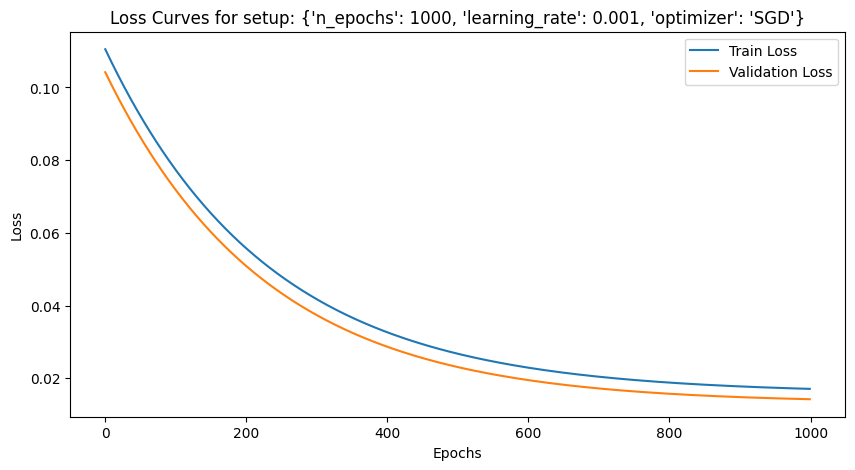

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'SGD'} Test Loss:  0.014721584506332874
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  0 | Train Loss:  0.09485693275928497 | Validation Loss:  0.06007534638047218
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  1 | Train Loss:  0.06500546634197235 | Validation Loss:  0.039976272732019424
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  2 | Train Loss:  0.04424969479441643 | Validation Loss:  0.02296549268066883
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  3 | Train Loss:  0.026399031281471252 | Validation Loss:  0.011563479900360107
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  4 | Train Loss:  0.013892685063183308 | Validation Loss:  0.009515133686363697
Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Epoch:  5 | Trai

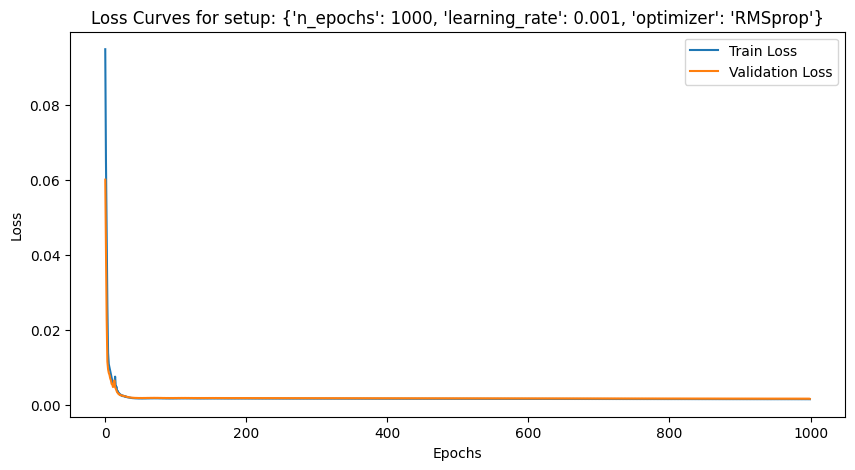

Setup:  {'n_epochs': 1000, 'learning_rate': 0.001, 'optimizer': 'RMSprop'} Test Loss:  0.001331959618255496


In [ ]:
best_val_loss = float('inf')
best_model_path = "model_weights_best_lstm.pth"

setups = [
    {"n_epochs": 300, "learning_rate": 0.01, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.01, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.1, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "Adam"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "SGD"},
    {"n_epochs": 1000, "learning_rate": 0.001, "optimizer": "RMSprop"}
]

input_size = X_train.shape[2]
hidden_size = 64
output_size = 1
num_layers = 3

for setup in setups:
    n_epochs = setup["n_epochs"]
    learning_rate = setup["learning_rate"]
    optimizer_name = setup["optimizer"]

    lstm = LSTM(input_size, hidden_size, num_layers, output_size)
    if optimizer_name == "Adam":
        optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
    elif optimizer_name == "SGD":
        optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(lstm.parameters(), lr=learning_rate)
    else:
        raise ValueError(f"Invalid optimizer name: {optimizer_name}")

    criterion = nn.MSELoss()


    train_losses = []
    val_losses = []

    for epoch in range(n_epochs):
        lstm.train()
        hidden_state = None
        output = lstm(X_train)
        loss = criterion(output.view(-1), y_train)
        train_losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        lstm.eval()
        val_hidden_state = None
        test_output = lstm(X_val)
        val_loss = criterion(test_output.view(-1), y_val)
        val_losses.append(val_loss.item())
        print('Setup: ', setup, 'Epoch: ', epoch, '| Train Loss: ', loss.item(), '| Validation Loss: ', val_loss.item())

        if val_loss < best_val_loss:
            torch.save(lstm.state_dict(), best_model_path)
            best_val_loss = val_loss

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"Loss Curves for setup: {setup}")
    plt.legend()
    plt.show()

    lstm.eval()
    test_hidden_state = None
    pred_test = lstm(X_test)
    test_loss = criterion(pred_test.view(-1), y_test)
    print('Setup: ', setup, 'Test Loss: ', test_loss.item())


# ##REFERENCES

- https://pytorch.org/
- https://scikit-learn.org/stable/